# Цыпаев Владимир Николаевич

# Лабораторная работа №2

# 11 вариант

# РИМ-181228

1) Импорт библиотек 

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


2) Подгрузка данных из моего варианта

In [2]:
Data = [18.47, 14.87, 21.51, 9.07, 16.02, 11.12, 23.45, 6.45, 14.21, 8.18, 14.50, 3.86, 10.14, 9.99, 14.47, 0.65, 8.97, 2.47, 12.58, 3.12, 6.81, 0.43, 4.65, 5.91]
Data = np.asarray(Data);

In [5]:
24 == Data.size

True

3) Построение графика заданного ряда на временном интервале от 0 до 1

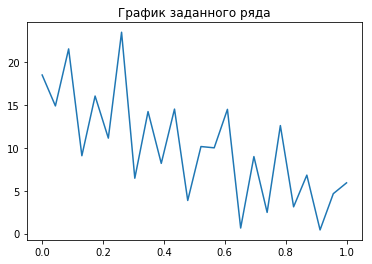

In [6]:
t = np.linspace(0, 1, Data.size)
plt.plot(t,Data)
plt.title("График заданного ряда")
plt.show()

4) Расчёт мат. ожидания и дисперсии для ВР

In [7]:
M = np.mean(Data)
D = np.var(Data)
print(f'Математическое ожидание: {M}')
print(f'Дисперсия: {D}')

Математическое ожидание: 10.079166666666667
Дисперсия: 37.705232638888894


5) Построение автокорреляционной функции временного ряда

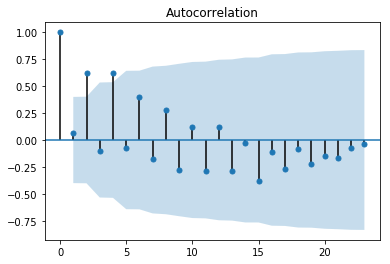

In [8]:
acf = plot_acf(Data)

ACF показывает зависимость взаимосвязи между функцией (сигналом) и её сдвинутой копией от величины временного сдвига.
Модель не сильно знакопеременна.
Модель для временного ряда может определяться авторегрессионной моделью второго порядка либо моделью скользящего среднего второго порядка

6) Построение периодограммы временного ряда

In [9]:
pds, pdden = signal.periodogram(Data)

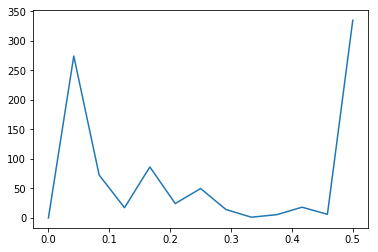

In [11]:
plt.plot(pds, pdden)
plt.show()

Периодограмма - оценка спектральной платности мощонсти, то же самое что автокорреляционная функция, но в частотном представлении

7) Построение оценки спектральной плотности мощности ряда с помощью метода Велша - сглаживает периодограмму

In [10]:
pdw, pddenw = signal.welch(Data, nperseg = 24)

nperseg - длина сегмента

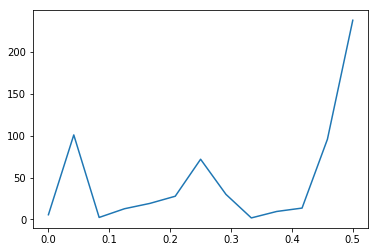

In [11]:
plt.plot(pdw, pddenw)
plt.show()

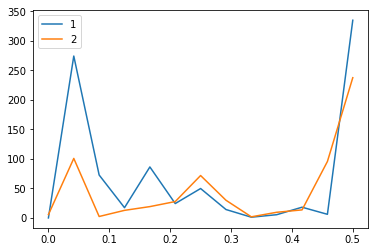

In [12]:
plt.plot(pds, pdden)
plt.plot(pdw, pddenw)
plt.legend(['1', '2'])    
plt.show()

Построение периодограммы без искажений

# Проверка на аномальные наблюдения
9) Проверка ряда на аномальные наблюдения с помощью метода Ирвина

In [13]:
def irvinMethod(Data):
    coef = 1.23;
    M = np.mean(Data);
    Vmean = np.sqrt(np.sum((Data-M)**2)/(len(Data))); #выборочное СКО
    res = np.zeros(len(Data));
    for i in range(1,len(Data)):
        k = np.abs(Data[i]-Data[i-1])/Vmean;
        if (k > coef):
            res[i] = Data[i]
    return res

10) Найденные аномальные наблюдения

<function matplotlib.pyplot.show>

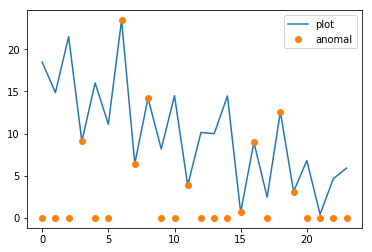

In [14]:
irvinResult = irvinMethod(Data)
plt.plot(Data)
plt.plot(irvinResult, 'o')
plt.legend(['plot', 'anomal'])
plt.show

11) Доказательство того, что во временном ряду есть неслучайная составляющая с помощью критерия серий 

In [15]:
def seriasCriteria(X):
    N = X.size
    
    M = X[(N+1)/2] if N % 2 > 0 else 0.5*(X[np.int(N/2)] + X[np.int(N/2) + 1])

    if (X[0] > M):
        current = 1
    else:
        current = 0
    vcount = 0 #общее число серий
    tlength = 0 #протяженность текущей серии
    tmax = 0;#протяженность самой длинной серии
    for i in range(1,N):
        print(f'step {i}: {X[i] > M}' )
        if (X[i] > M): # Серия +
            if (current != 1):
                vcount = vcount + 1
                if (tlength > tmax):
                    tmax = tlength
                tlength = 0
            else:
                tlength = tlength + 1
            current = 1
        elif (X[i] < M): # Серия -
            if (current != 1):
                vcount = vcount + 1
                if (tlength > tmax):
                    tmax = tlength
                tlength = 0
            else:
                tlength = tlength + 1
            current = 1
            
    if ((vcount <= 0.5*(N+2-1.96*np.sqrt(N-1))))|(tmax >= 1.43*np.log(N+1)):
        res = 'принятие альтернативной гипотезы о неслучайной составляющей ряда'
    else:
        res = 'гипотеза о неизменности среднего значения ВР отвергается с вероятностью ошибки альфа (a = 0.05)'
    return res

In [16]:
seriasCriteria(Data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Оценка на стационарность

# KPSS-тест
13-16) Использование KPSS-теста

In [3]:
kpss_results, p_value, lags, critical_points = tsa.kpss(Data)

In [4]:
print(f'kpss_results: {kpss_results}.\np-value: {p_value}.\nНулевая гипотеза: {p_value < 0.05}')

kpss_results: 0.39271344867685026.
p-value: 0.0802959272944611.
Нулевая гипотеза: False


# Критерий Фишера

17-18) Использование критерия Фишера - постоянство дисперсии

In [6]:
data1 = Data[:Data.size//2]
data2 = Data[Data.size//2:]

fisher_results, fisher_pvalue = stats.f_oneway(data1, data2)

In [7]:
print(f'fisher_results: {fisher_results}.\np-value: {fisher_pvalue}.\nНулевая гипотеза: {fisher_pvalue < 0.05}')

fisher_results: 9.699734877026312.
p-value: 0.00505158158872046.
Нулевая гипотеза: True


# Критерий Стьюдента

19-20) Использование критерия Стьюдента - постоянство мат. ожидания

In [9]:
def studentCriteria(data, alpha = 0.05):
    data1 = Data[:len(data)//2]
    data2 = Data[len(data)//2:]

    N1 = data1.size
    N2 = data2.size
    
    student_value = stats.t.ppf(1-alpha, N1 + N2-1)
    
    Ks = ((np.mean(data1)-np.mean(data2)) / ((len(data1)-1)*np.var(data1) + (len(data2)-1)*np.var(data2))**(1/2) *
              ((len(data1) * len(data2) * (len(data1)+len(data2)-2)) / (len(data1)+len(data2)))**(1/2))
    
    print(f'Ks: {Ks}.\nstudent_value = {student_value}.\nГипотеза о постоянстве мат ожидания: {Ks < student_value}')

In [10]:
studentCriteria(Data)

Ks: 3.2529262144653663.
student_value = 1.7138715277470473.
Гипотеза о постоянстве мат ожидания: False


In [11]:
data1 = Data[:Data.size//2]
data2 = Data[Data.size//2:]

student_result, student_pvalue = scipy.stats.ttest_ind(data1, data2)

In [12]:
print(f'student_result: {student_result}.\np-value: {student_pvalue}.\nНулевая гипотеза: {student_pvalue < 0.05}')

student_result: 3.1144397372603487.
p-value: 0.0050515815887204685.
Нулевая гипотеза: True
